### Stage 1: Data preprocessing

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

### 1. Data Loading

Kaggle: https://www.kaggle.com/datasets/nurudeenabdulsalaam/fitbit-fitness-tracker-data

#### 1.1. Calories Series

In [94]:
FitBit_calories = pd.read_csv("FitBit data/dailyCalories_merged.csv")

print(f"Dataframe columns ({len(FitBit_calories.columns)}):", FitBit_calories.columns)
print("Number of rows:", FitBit_calories.last_valid_index()+1)

FitBit_calories.rename(columns={"ActivityDay": "Day"}, inplace=True)
FitBit_calories["Day"] = pd.to_datetime(FitBit_calories["Day"]).dt.date

print("\nNumber of NULL elements:")
print(FitBit_calories.isnull().sum())

FitBit_calories

Dataframe columns (3): Index(['Id', 'ActivityDay', 'Calories'], dtype='object')
Number of rows: 940

Number of NULL elements:
Id          0
Day         0
Calories    0
dtype: int64


,Id,Day,Calories
0,1503960366,2016-04-12,1985
1,1503960366,2016-04-13,1797
2,1503960366,2016-04-14,1776
3,1503960366,2016-04-15,1745
4,1503960366,2016-04-16,1863
...,...,...,...
935,8877689391,2016-05-08,2847
936,8877689391,2016-05-09,3710
937,8877689391,2016-05-10,2832
938,8877689391,2016-05-11,3832


#### 1.2. Steps Series

In [95]:
FitBit_steps = pd.read_csv("FitBit data/dailySteps_merged.csv")

print(f"Dataframe columns ({len(FitBit_steps.columns)}):", FitBit_steps.columns)
print("Number of rows:", FitBit_steps.last_valid_index()+1)

FitBit_steps.rename(columns={"ActivityDay": "Day", "StepTotal": "Steps"}, inplace=True)
FitBit_steps["Day"] = pd.to_datetime(FitBit_steps["Day"]).dt.date

print("\nNumber of NULL elements:")
print(FitBit_steps.isnull().sum())

FitBit_steps

Dataframe columns (3): Index(['Id', 'ActivityDay', 'StepTotal'], dtype='object')
Number of rows: 940

Number of NULL elements:
Id       0
Day      0
Steps    0
dtype: int64


,Id,Day,Steps
0,1503960366,2016-04-12,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669
...,...,...,...
935,8877689391,2016-05-08,10686
936,8877689391,2016-05-09,20226
937,8877689391,2016-05-10,10733
938,8877689391,2016-05-11,21420


#### 1.3. Sleep Minutes Series

In [96]:
FitBit_sleep_mins = pd.read_csv("FitBit data/sleepDay_merged.csv")

print(f"Dataframe columns ({len(FitBit_sleep_mins.columns)}):", FitBit_sleep_mins.columns)
print("Number of rows:", FitBit_sleep_mins.last_valid_index()+1)

FitBit_sleep_mins.rename(columns={"SleepDay": "Day"}, inplace=True)
FitBit_sleep_mins.drop(["TotalSleepRecords", "TotalTimeInBed"], axis=1, inplace=True)
FitBit_sleep_mins["Day"] = pd.to_datetime(FitBit_sleep_mins["Day"]).dt.date

print("\nNumber of NULL elements:")
print(FitBit_sleep_mins.isnull().sum())

FitBit_sleep_mins

Dataframe columns (5): Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')
Number of rows: 413

Number of NULL elements:
Id                    0
Day                   0
TotalMinutesAsleep    0
dtype: int64


,Id,Day,TotalMinutesAsleep
0,1503960366,2016-04-12,327
1,1503960366,2016-04-13,384
2,1503960366,2016-04-15,412
3,1503960366,2016-04-16,340
4,1503960366,2016-04-17,700
...,...,...,...
408,8792009665,2016-04-30,343
409,8792009665,2016-05-01,503
410,8792009665,2016-05-02,415
411,8792009665,2016-05-03,516


#### 1.4.1. Intensities Series

In [97]:
FitBit_intensities = pd.read_csv("FitBit data/dailyIntensities_merged.csv")

print(f"Dataframe columns ({len(FitBit_intensities.columns)}):", FitBit_intensities.columns)
print("Number of rows:", FitBit_intensities.last_valid_index()+1)

FitBit_intensities.rename(columns={"ActivityDay": "Day"}, inplace=True)
FitBit_intensities.drop(
    ["SedentaryActiveDistance", "LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance"],
    axis=1, 
    inplace=True
)

FitBit_intensities["Day"] = pd.to_datetime(FitBit_intensities["Day"]).dt.date

print("\nNumber of NULL elements:")
print(FitBit_intensities.isnull().sum())

FitBit_intensities

Dataframe columns (10): Index(['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance',
       'LightActiveDistance', 'ModeratelyActiveDistance',
       'VeryActiveDistance'],
      dtype='object')
Number of rows: 940

Number of NULL elements:
Id                      0
Day                     0
SedentaryMinutes        0
LightlyActiveMinutes    0
FairlyActiveMinutes     0
VeryActiveMinutes       0
dtype: int64


,Id,Day,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
0,1503960366,2016-04-12,728,328,13,25
1,1503960366,2016-04-13,776,217,19,21
2,1503960366,2016-04-14,1218,181,11,30
3,1503960366,2016-04-15,726,209,34,29
4,1503960366,2016-04-16,773,221,10,36
...,...,...,...,...,...,...
935,8877689391,2016-05-08,1174,245,4,17
936,8877689391,2016-05-09,1131,217,19,73
937,8877689391,2016-05-10,1187,224,11,18
938,8877689391,2016-05-11,1127,213,12,88


#### 1.4.2. Feature Conversion for Intensities Series

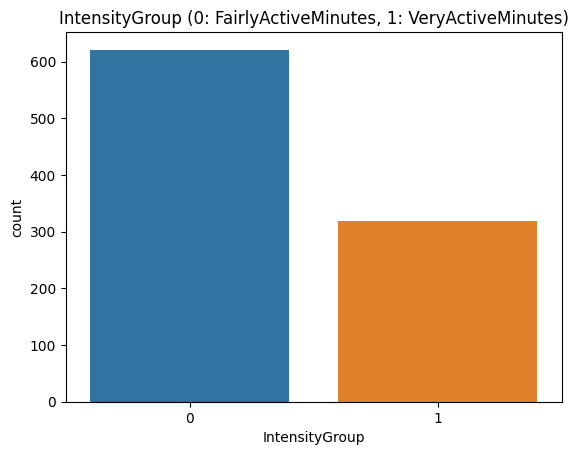

,Id,Day,IntensityGroup
0,1503960366,2016-04-12,1
1,1503960366,2016-04-13,1
2,1503960366,2016-04-14,1
3,1503960366,2016-04-15,0
4,1503960366,2016-04-16,1
...,...,...,...
935,8877689391,2016-05-08,1
936,8877689391,2016-05-09,1
937,8877689391,2016-05-10,1
938,8877689391,2016-05-11,1


In [98]:
FitBit_intensities["IntensityGroup"] = (
    FitBit_intensities["VeryActiveMinutes"] > FitBit_intensities["FairlyActiveMinutes"]
).astype(int)

FitBit_intensities.drop(
    columns=["SedentaryMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"], inplace=True
)

sns.countplot(x=FitBit_intensities["IntensityGroup"])
plt.title("IntensityGroup (0: FairlyActiveMinutes, 1: VeryActiveMinutes)")
plt.show()

FitBit_intensities

### 2. Data Merging

In [99]:
FitBit_calories_steps = pd.merge(
    FitBit_calories, FitBit_steps,
    on=["Id", "Day"],
    how="left",
)

FitBit_calories_steps_sleep = pd.merge(
    FitBit_calories_steps, FitBit_sleep_mins,
    on=["Id", "Day"],
    how="left",
)

FitBit_data = pd.merge(
    FitBit_calories_steps_sleep, FitBit_intensities,
    on=["Id", "Day"],
    how="left",
)

FitBit_data.dropna(inplace=True) # Data of sleep minutes is limited by 413 days
FitBit_data.reset_index(drop=True, inplace=True)

FitBit_data

,Id,Day,Calories,Steps,TotalMinutesAsleep,IntensityGroup
0,1503960366,2016-04-12,1985,13162,327.0,1
1,1503960366,2016-04-13,1797,10735,384.0,1
2,1503960366,2016-04-15,1745,9762,412.0,0
3,1503960366,2016-04-16,1863,12669,340.0,1
4,1503960366,2016-04-17,1728,9705,700.0,1
...,...,...,...,...,...,...
408,8792009665,2016-04-30,2896,7174,343.0,0
409,8792009665,2016-05-01,1962,1619,503.0,0
410,8792009665,2016-05-02,2015,1831,415.0,0
411,8792009665,2016-05-03,2297,2421,516.0,0


In [100]:
FitBit_data.to_csv("FitBit_initial_data.csv", index=False)

### 3. Data Visualization

#### 3.1. Outliers

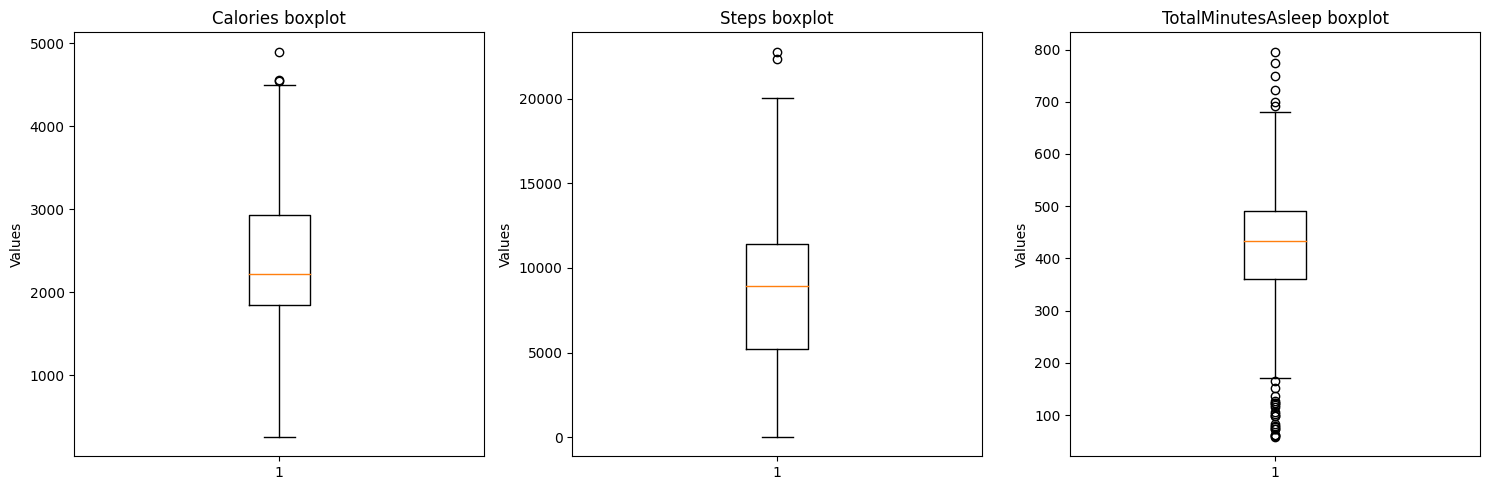

In [101]:
plt.figure(figsize=(15,5))
for column,i in zip(["Calories", "Steps", "TotalMinutesAsleep"],range(1,4)):
    plt.subplot(1,3,i)
    plt.title(f"{column} boxplot")
    plt.ylabel("Values")
    plt.boxplot(FitBit_data[column])
    plt.tight_layout()

plt.show()

#### 3.2. Histograms

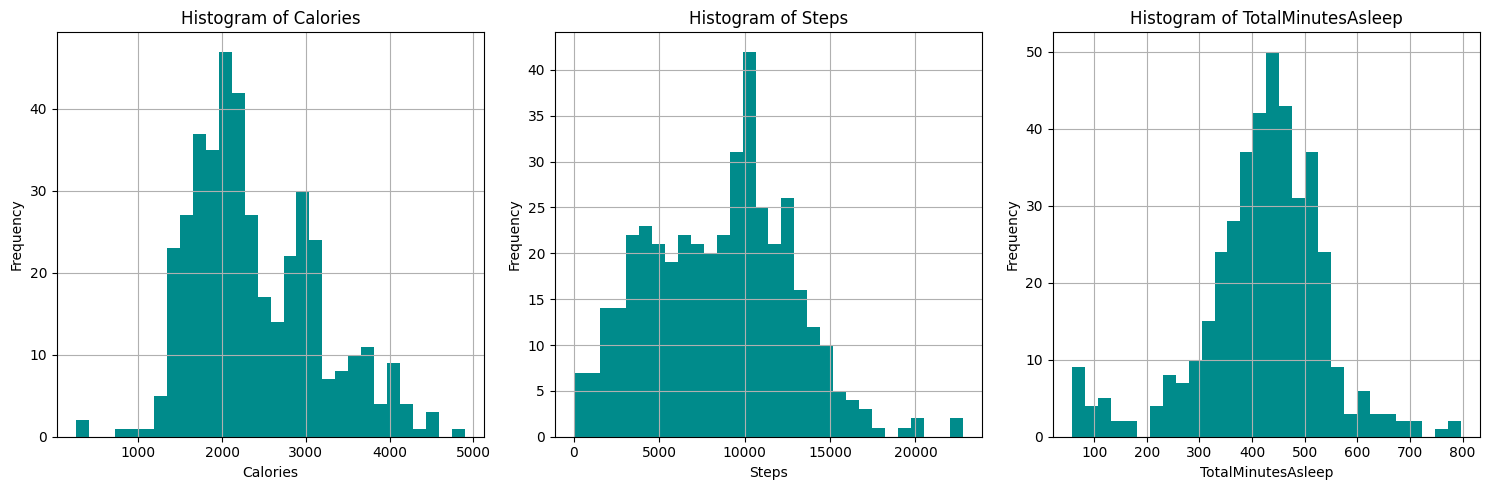

In [102]:
# List of columns to plot (exclude "Id" and "Day")
columns_to_plot = ["Calories", "Steps", "TotalMinutesAsleep"]

# Create subplots with a single row
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    FitBit_data[column].hist(bins=30, color="darkcyan", ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### 3.3. Correlation

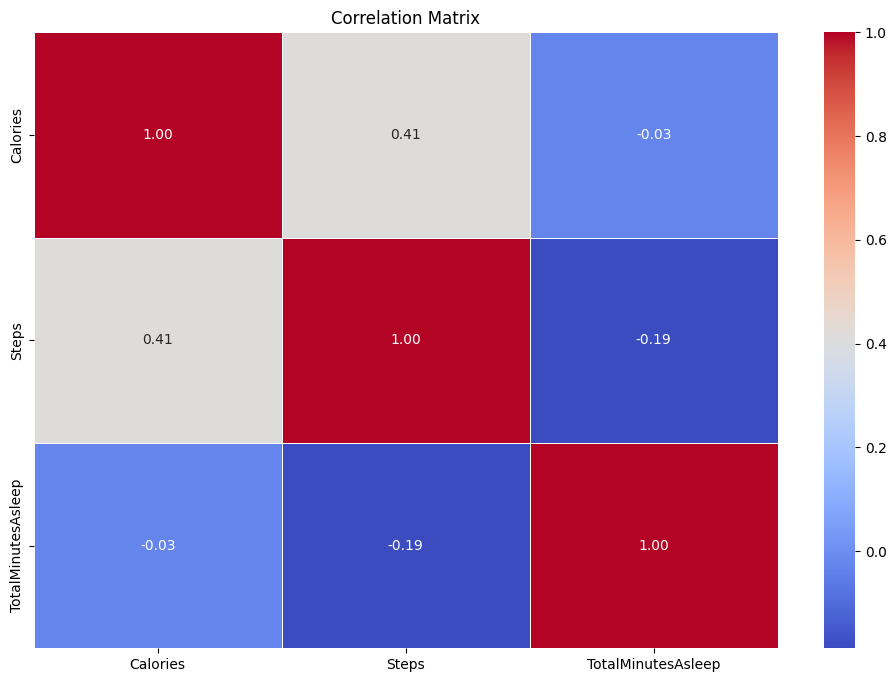

In [103]:
columns_for_correlation = ["Calories", "Steps", "TotalMinutesAsleep"]

# Create a correlation matrix
correlation_matrix = FitBit_data[columns_for_correlation].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

#### 3.4. Pairplots

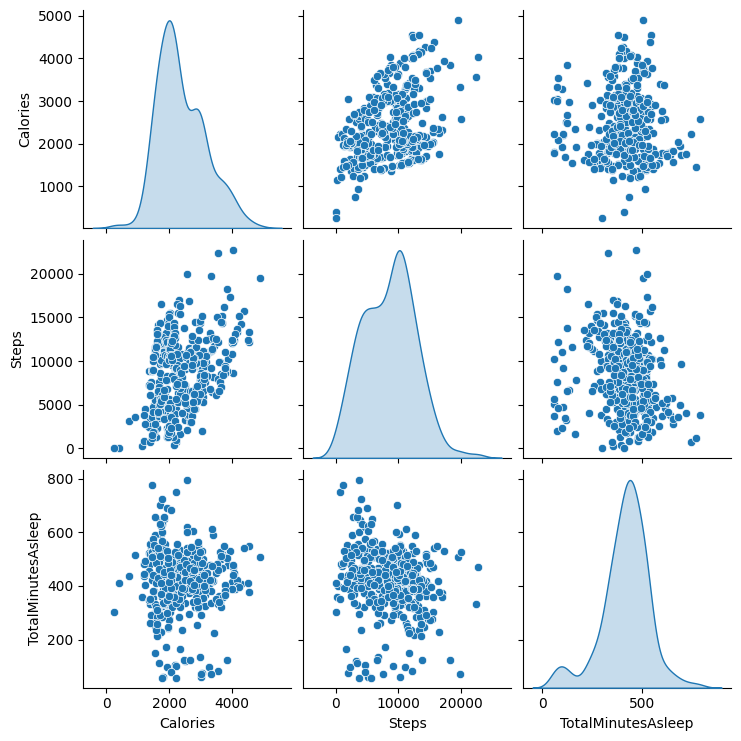

In [104]:
# List of columns for the pair plot
selected_columns = ["Calories", "Steps", "TotalMinutesAsleep"]

# Create the pair plot
sns.pairplot(FitBit_data[selected_columns], diag_kind='kde')
plt.show()

#### 3.5. t-SNE

Dimention of X: (413, 2)
Kullback-Leibler divergence: 0.3364574909210205
No. of iterations: 4999


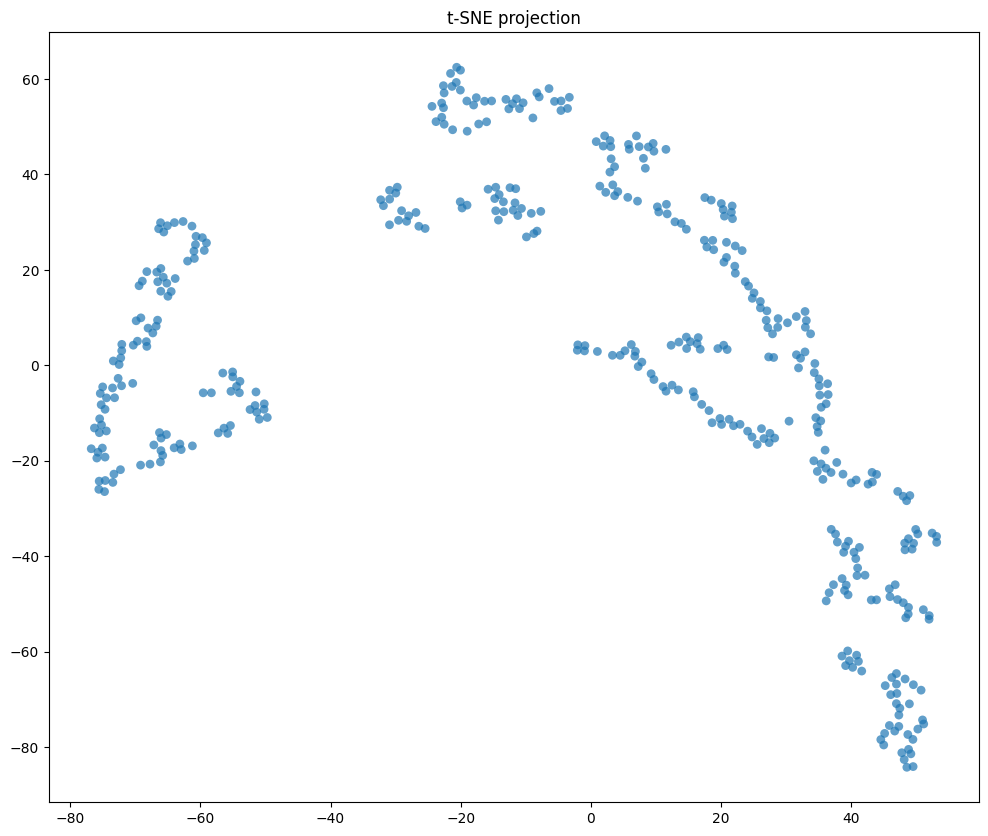

In [105]:
tsne = TSNE(
    n_components=2, # значення за замовчуванням=2. Розмірність вкладеного простору.
    perplexity=10, # значення за замовчуванням=30.0. Перплексія пов'язана з кількістю найближчих сусідів, яка використовується в інших алгоритмах навчання на множинах.
    early_exaggeration=12, # значення за замовчуванням=12.0. Визначає, наскільки щільними будуть природні кластери вихідного простору у вкладеному просторі і скільки місця буде між ними. 
    learning_rate=200, # значення за замовчуванням=200.0. Швидкість навчання для t-SNE зазвичай перебуває в діапазоні [10.0, 1000.0]. Якщо швидкість навчання занадто висока, дані можуть виглядати як "куля", у якій будь-яка точка приблизно рівновіддалена від найближчих сусідів. Якщо швидкість навчання занадто низька, більшість точок можуть бути схожими на стиснуту щільну хмару з незначною кількістю розкидів. 
    n_iter=5000, # значення за замовчуванням=1000. Максимальна кількість ітерацій для оптимізації. Має бути не менше 250.
    n_iter_without_progress=300, # значення за замовчуванням=300. Максимальна кількість ітерацій без прогресу перед припиненням оптимізації, використовується після 250 початкових ітерацій з раннім перебільшенням.
    min_grad_norm=0.0000001, # значення за замовчуванням=1e-7. Якщо норма градієнта нижча за цей поріг, оптимізацію буде зупинено.
    metric='euclidean', # значення за замовчуванням='euclidean', Метрика, що використовується під час розрахунку відстані між екземплярами в масиві ознак.
    init='random', # {'random', 'pca'} або ndarray форми (n_samples, n_components), значення за замовчуванням='pca'. Ініціалізація вкладення.
    verbose=0, # значення за замовчуванням=0. Рівень деталізації.
    random_state=42, # екземпляр RandomState або None, за замовчуванням=None. Визначає генератор випадкових чисел. Передача int для відтворюваних результатів при багаторазовому виклику функції.
    method='barnes_hut', # значення за замовчуванням='barnes_hut'. За замовчуванням алгоритм обчислення градієнта використовує апроксимацію Барнса-Хата, що працює протягом часу O(NlogN). метод='exact' працюватиме за повільнішим, але точнішим алгоритмом за час O(N^2). Слід використовувати точний алгоритм, коли кількість помилок найближчих сусідів має бути нижче 3%.
    angle=0.5, # значення за замовчуванням=0.5. Використовується тільки якщо метод='barnes_hut' Це компроміс між швидкістю і точністю у випадку T-SNE із застосуванням алгоритму Барнса-Хата.
    n_jobs=-1, # значення за замовчуванням=None. Кількість паралельних завдань для пошуку сусідів. -1 означає використання всіх процесорів.
)

X_embedded = tsne.fit_transform(FitBit_data[["Calories", "Steps", "TotalMinutesAsleep"]])

print("Dimention of X:", X_embedded.shape)
print("Kullback-Leibler divergence:", tsne.kl_divergence_)
print("No. of iterations:", tsne.n_iter_)

plt.figure(figsize=(12, 10))
plt.scatter(
    X_embedded[:, 0],
    X_embedded[:, 1],
    edgecolor="none",
    alpha=0.7,
    s=40
)

plt.title("t-SNE projection")
plt.show()